<BR>

# Анализ игр и игровых платформ 


<a id='section_id'></a>

*Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры - закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.*  
  
*Перед нами данные до 2016 года. Мы планируем кампанию на 2017-й.*  
  
*В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*


<BR>  
## Оглавление <a id='section_id_100'></a> 
    
 
- [Шаг 1. Изучение общей информации](#section_id_11) 
  - [1.1 Импорт библиотек](#section_id_12) 
  - [1.2 Открытие файлов](#section_id_13)
  - [1.3 Изучение общей информации](#section_id_13)
  - [1.4 Вывод  ](#section_id_14)
- [Шаг 2. Подготовка данных](#section_id_2)
  - [2.1 Названия столбцов](#section_id_21)
  - [2.2 Обработка пропусков ](#section_id_23)
  - [2.3 Типы данных ](#section_id_22)  
  - [2.4 Посчитаем суммарные продажи во всех регионах](#section_id_24)
  - [2.5 Вывод](#section_id_25)
- [Шаг 3. Исследовательский анализ данных ](#section_id_3)
  - [3.1 Сколько игр выпускалось в разные годы](#section_id_31)
  - [3.2 Как менялись продажи по платформам](#section_id_32)
  - [3.3 Определим актуальный период](#section_id_33)   
  - [3.4 Какие платформы лидируют по продажам](#section_id_34)
  - [3.5 Глобальные продажи игр в разбивке по платформам](#section_id_35)
  - [3.6 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков](#section_id_36) 
  - [3.7 Соотнесем выводы с продажами игр на других платформах](#section_id_37)
  - [3.8 Общее распределение игр по жанрам](#section_id_38)
  - [3.9 Вывод](#section_id_39)
- [Шаг 4. Портрет пользователя каждого региона ](#section_id_4)
  - [4.1 Самые популярные платформы (топ-5)](#section_id_41)
  - [4.2 Самые популярные жанры (топ-5)](#section_id_42)
  - [4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#section_id_43)
  - [4.4 Вывод ](#section_id_44)
- [Шаг 5. Проверим пару гипотез](#section_id_5)
  - [5.1 Гипотиза №1](#section_id_51)
  - [5.2 Гипотиза №2](#section_id_52)
  - [5.3 Вывод](#section_id_53)
- [Шаг 6. Общий вывод ](#section_id_6)   


<BR>

<BR>

# Шаг 1. Изучение общей информации <a id='section_id_1'></a>

## 1.1 Импорт библиотек <a id='section_id_11'></a>

In [ ]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
from math import factorial 
from scipy import stats as st
import random
import math
from scipy.stats import levene

from io import BytesIO
import requests

## 1.2 Открытие файлов <a id='section_id_12'></a>

In [ ]:


file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(id)

r = requests.get(file_name)

df = pd.read_csv(BytesIO(r.content))

## 1.3 Изучение общей информации <a id='section_id_13'></a>

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df.shape

(16715, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Описание данных  
  
- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB 

## 1.4 Вывод <a id='section_id_14'></a>

**- одна таблица**
<BR> **- 16715 строк, 11 признаков**
<BR> **- названия столбцов с заглавной буквы**
<BR> **- поправить типы данных**
<BR> **- есть пропуски** 
  
[оглавление](#section_id_100)

<BR>

# Шаг 2. Подготовка данных <a id='section_id_2'></a>

## 2.1 Названия столбцов <a id='section_id_21'></a>
  


In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [ ]:
df.set_axis(['name', 'platform', 'release', 'genre', 'na_sales', 'eu_sales', \
             'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],axis='columns',inplace =True)

In [ ]:
df.head(1)

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


**названия столбцов приведины к нижнему регистру**

## 2.2 Обработка пропусков <a id='section_id_23'></a>

In [ ]:
df.isna().sum()

name               2
platform           0
release          269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
rating          6766
dtype: int64

In [ ]:
# название игры

# df['name'] = df['name'].fillna('отсутствует')

df = df.dropna(subset=['name'])
df['name'].isna().sum()

0

**два прпуска в названии заменяем на "отсутствует"**

In [ ]:
#  дата релиза

# df['release'] = df['release'].fillna(1000)

df = df.dropna(subset=['release'])
df['release'].isna().sum()

0

**пропуски в дате заменяем на нереальную дату 1000, в дальнейшем если понадобиться, через срез будет проще ее заметить и убирать**

In [ ]:
# жанр

# df['genre'] = df['genre'].fillna('отсутствует') 

df = df.dropna(subset=['genre'])
df['genre'].isna().sum()

0

**пропуски заменяем на "отсутствует"**

In [ ]:
# оценки критиков

df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

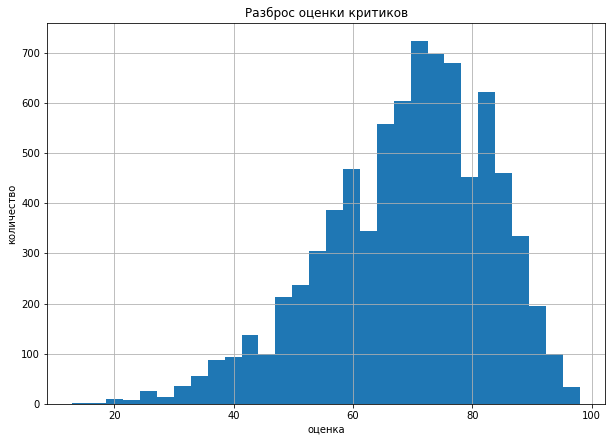

In [ ]:
df['critic_score'].hist(bins=30, figsize=(10,7));
plt.title('Разброс оценки критиков');
plt.xlabel('оценка');
plt.ylabel('количество');
plt.show();

**минимальные максимальные числа в пределах допустимого, среднее медиана почти равны, отклонение приемлемо**  
**пропусков около 8500, это половина всей выборки**  
**если начнем заменять на какое либо значение, сильно исказим картину**  
**заменять пропуски не будем**

In [ ]:
# оценки игроков

df['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

In [ ]:
df['user_score'].isna().sum()

6605

In [ ]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.9       2
0.3       2
1.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [ ]:
# df['user_score'] = df['user_score'].replace('tbd',np.nan)

df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')
df['user_score'].value_counts(dropna=False).head()

NaN    8981
7.8     322
8.0     285
8.2     276
8.3     252
Name: user_score, dtype: int64

**странное занчение tbd, повторяется 2424 раза**  
**возможно системная ошибка, надо будет об этом указать**  
**в данный момент заменил на NaN**  
**пропусков стало еще больше, 9125**  
**заменять не будем что бы не искажать статистики**

In [ ]:
# рейтинг

df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [ ]:
df['rating'].isna().sum()

6676

In [ ]:
df['rating'] = df['rating'].fillna('XXX')

In [ ]:
df['rating'].isna().sum()

0

**пропуски в рейтинги заменили на "ХХХ"**

In [ ]:
df.isna().sum()

name               0
platform           0
release            0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8461
user_score      8981
rating             0
dtype: int64

**пропуски остались только в оценках критиков и игроков**  
**заменять их не стали, что бы не искажать статистики**

## 2.3 Типы данных <a id='section_id_22'></a>

In [ ]:
df.dtypes

name             object
platform         object
release         float64
genre            object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
critic_score    float64
user_score      float64
rating           object
dtype: object

In [ ]:
df['release'] = df['release'].astype(int)

# df['critic_score'] = df['critic_score'].astype(int)
# df['user_score'] = df['user_score'].astype(int)
# df['user_score'] = int(df['user_score'])

df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')
df.dtypes

name             object
platform         object
release           int64
genre            object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
critic_score    float64
user_score      float64
rating           object
dtype: object

**заменили год релиза на целое число**  
**оценки игроков на числовой формат**

In [ ]:
df.critic_score = pd.array(df.critic_score, dtype="Int64") 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   release       16444 non-null  int64  
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  7983 non-null   Int64  
 9   user_score    7463 non-null   float64
 10  rating        16444 non-null  object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


## 2.4 Посчитаем суммарные продажи во всех регионах <a id='section_id_24'></a>

  

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.sample(10)

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13190,Harukanaru Toki no Naka de 3,PS2,2004,Adventure,0.00,0.00,0.05,0.00,<NA>,NaN,XXX,0.05
3153,Onimusha: Dawn of Dreams,PS2,2006,Action,0.15,0.12,0.34,0.04,81,8.9,M,0.65
12655,Dig Dug: Digging Strike,DS,2005,Puzzle,0.05,0.00,0.00,0.00,65,NaN,E,0.05
16085,Blackthorne,GBA,2003,Action,0.01,0.00,0.00,0.00,67,7.6,T,0.01
16133,Totally Spies! Totally Party,PS2,2008,Misc,0.01,0.01,0.00,0.00,<NA>,NaN,XXX,0.02
1642,Parfait: Chocolat Second Style,PS2,2006,Adventure,0.59,0.46,0.01,0.15,<NA>,NaN,XXX,1.21
2520,Devil May Cry HD Collection,PS3,2012,Action,0.42,0.19,0.11,0.09,74,8.8,M,0.81
4515,Dora the Explorer: Dora Puppy,DS,2009,Misc,0.39,0.01,0.00,0.03,<NA>,NaN,XXX,0.43
15564,Super Fruit Fall,Wii,2006,Puzzle,0.01,0.00,0.00,0.00,<NA>,NaN,E,0.01
11265,Bomberman Land Touch!,DS,2006,Puzzle,0.04,0.00,0.04,0.00,<NA>,NaN,XXX,0.08


In [ ]:
df['total_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

**очень большой максимум, стандартное отклонение намного больше среднего**  
**среднее и мидиана сильно разнятся**  
**есть аномальные значения**
**однако, такие статистики возможны**  
**мы имеем дело с продажами игр на платформах со всех регионов со всех платформ за все время**  
**считаю, удалять выбросы пока рано**


## 2.5 Вывод <a id='section_id_25'></a>

  
**- пропуски в `rating` заменили на ХХХ**  
**- пропуски в `release`, `name` и `genre`, удалили**  
**- остались пропуски в `critic_score` и `user_score`**  
**- были странные значения в `user_score` - tbd, заменили эту абривиатуру на пропуски**  
**- выбросы в `total_sales` оставили**  
  
[оглавление](#section_id_100)

<BR>

# Шаг 3. Исследовательский анализ данных <a id='section_id_3'></a>

## 3.1 Сколько игр выпускалось в разные годы <a id='section_id_31'></a>
  


In [ ]:
df.head()

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,XXX,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,XXX,31.38


In [ ]:
df.groupby('release')['name'].nunique()

release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      41
1993      59
1994     117
1995     215
1996     258
1997     282
1998     364
1999     326
2000     325
2001     428
2002     631
2003     546
2004     550
2005     657
2006     773
2007     884
2008    1039
2009    1001
2010     900
2011     779
2012     446
2013     335
2014     319
2015     362
2016     297
Name: name, dtype: int64

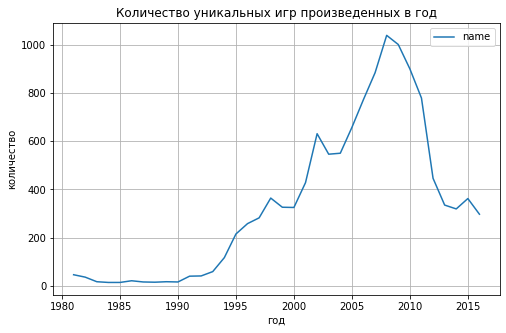

In [ ]:
df.groupby('release')['name'].nunique().reset_index().drop(0).plot(x='release',y='name',figsize=(8,5),grid=True);
plt.xlabel('год');
plt.ylabel('количество');
plt.title('Количество уникальных игр произведенных в год')
plt.legend();
plt.show();

**до 1994 года игр выходило меньше 100 в год**  
**в 1995 вышло 200 игр**  
**после 1996 года индустрия игр стала бурно развиваться**

## 3.2 Как менялись продажи по платформам <a id='section_id_32'></a>
  

  


In [ ]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

**выбрем 10 самых продоваемых платформ**

In [ ]:
top_platform = pd.Series(df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index)
top_platform

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     PS4
7     GBA
8     PSP
9     3DS
Name: platform, dtype: object

In [ ]:
df2 = df[df['platform'].isin(top_platform)]
df2.groupby('platform')['platform'].count().sort_values(ascending=False)

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
GBA      811
3DS      512
PS4      392
Name: platform, dtype: int64

In [ ]:
df2 = df2.query('release > 1996')
dinamic = df2.pivot_table(index='platform',columns='release',values='total_sales')
dinamic = dinamic.round(2)
dinamic = dinamic.fillna('-')
dinamic

release,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,
3DS,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.54,0.55,0.62,0.55,0.32,0.33
DS,-,-,-,-,-,-,-,0.75,1.1,0.6,0.39,0.3,0.3,0.26,0.17,0.48,0.19,-,-,-
GBA,-,-,-,0.07,0.58,0.37,0.38,0.45,0.25,0.14,0.57,-,-,-,-,-,-,-,-,-
PS,0.72,0.68,0.72,0.6,0.39,0.33,0.69,-,-,-,-,-,-,-,-,-,-,-,-,-
PS2,-,-,-,0.48,0.9,0.73,0.72,0.82,0.62,0.4,0.36,0.28,0.28,0.15,0.06,-,-,-,-,-
PS3,-,-,-,-,-,-,-,-,-,0.78,0.81,0.86,0.81,0.79,0.73,0.73,0.9,0.44,0.23,0.09
PS4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.62,1.33,0.87,0.42
PSP,-,-,-,-,-,-,-,0.47,0.46,0.29,0.35,0.35,0.23,0.19,0.13,0.07,0.06,0.02,0.04,-
Wii,-,-,-,-,-,-,-,-,-,3.12,0.83,0.61,0.64,0.51,0.42,0.7,0.72,0.62,0.28,0.18


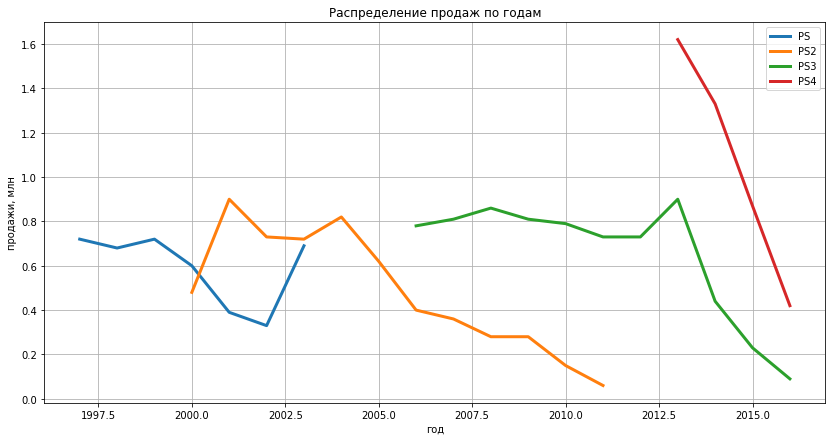

In [ ]:
dinamic = dinamic.replace('-',np.nan)
dinamic.reset_index()
#dinamic.loc['DS',:].plot(figsize =(14,7),linewidth=3);
dinamic.loc['PS',:].plot(figsize =(14,7),linewidth=3);
dinamic.loc['PS2',:].plot(figsize =(14,7),linewidth=3);
dinamic.loc['PS3',:].plot(figsize =(14,7),linewidth=3);
#dinamic.loc['PSP',:].plot(figsize =(14,7),linewidth=3);
#dinamic.loc['X360',:].plot(figsize =(14,7),linewidth=3);
dinamic.loc['PS4',:].plot(figsize =(14,7),linewidth=3);
plt.legend()
plt.grid()
plt.ylabel('продажи, млн');
plt.xlabel('год');
plt.title('Распределение продаж по годам');
plt.show();

 

**в совокупности, проанализировав сводную, и графики**  
**можно выделить примерный срок , когда появляются нывые, и исчезают старые платформы - это около 10 лет**

## 3.3 Определим актуальный период <a id='section_id_33'></a>
  
<a id='section_id_111'></a>

In [ ]:
df = df.query('release > 2013')
df['release'].value_counts()

2015    606
2014    581
2016    502
Name: release, dtype: int64

In [ ]:
len(df)

1689

**актуальный период определим - 2013/2016 год**  
**дальнейший анализ будем проводить по 1689 обьектам**  
**эти данные помогут построить прогноз на 2017 год**  
**теперь `df` это срез 2014/2016 годов** 

In [ ]:
import plotly.express as px

top = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = False).head(10).index

fig = px.line(df.query('platform in @top').pivot_table(index = ['release', 'platform'], values = 'total_sales', aggfunc = 'sum').reset_index(),
             x = 'release', y = 'total_sales', color = 'platform')
fig.show()

## 3.4 Какие платформы лидируют по продажам <a id='section_id_34'></a>


In [ ]:
df.head(5)

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,XXX,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,XXX,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,XXX,7.98


In [ ]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

**выделим топ самых прибыльных платформ последнего десятилетия**

In [ ]:
top = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index
top

Index(['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP'], dtype='object', name='platform')

In [ ]:
df_top = df[df['platform'].isin((top))]
df_top.sample(5)

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13043,Adventure Time: Finn & Jake Investigations,WiiU,2015,Action,0.03,0.02,0.00,0.00,<NA>,NaN,XXX,0.05
6754,The Walking Dead: Season Two,PS4,2014,Adventure,0.10,0.09,0.01,0.04,<NA>,NaN,XXX,0.24
16433,Kamigami no Asobi InFinite,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,XXX,0.01
7710,Castlevania: Lords of Shadow 2,PS3,2014,Action,0.03,0.12,0.02,0.03,63,7.8,M,0.20
9198,Rayman Legends,PSV,2014,Platform,0.01,0.10,0.00,0.03,87,8.4,E10+,0.14


In [ ]:
df_top = df_top.pivot_table(index='platform',columns='release',values='total_sales',aggfunc='sum')
df_top = df_top.round(2)
df_top = df_top.fillna('-')
df_top

release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.6
PS4,100.00,118.90,69.25
PSP,0.24,0.12,-
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.6
X360,34.74,11.96,1.52


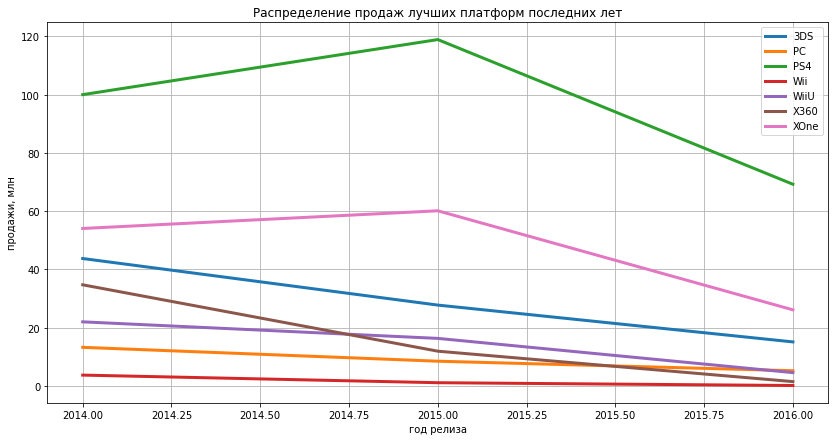

In [ ]:
df_top = df_top.replace('-',np.nan)
df_top.loc['3DS',:].plot(figsize =(14,7),linewidth=3);
df_top.loc['PC',:].plot(figsize =(14,7),linewidth=3);
#df_top.loc['PS3',:].plot(figsize =(14,7),linewidth=3);
df_top.loc['PS4',:].plot(figsize =(14,7),linewidth=3);
#df_top.loc['PSV',:].plot(figsize =(14,7),linewidth=3);
df_top.loc['Wii',:].plot(figsize =(14,7),linewidth=3);
df_top.loc['WiiU',:].plot(figsize =(14,7),linewidth=3);
df_top.loc['X360',:].plot(figsize =(14,7),linewidth=3);
df_top.loc['XOne',:].plot(figsize =(14,7),linewidth=3);
plt.legend();
plt.grid();
plt.ylabel('продажи, млн');
plt.xlabel('год релиза');
plt.title('Распределение продаж лучших платформ последних лет');
plt.show();

**в последние годы продажи на всех платформах падают**   
**в целом можно выделить несколько потенциально прибыльных платформ:**  
**PS4, 3DS, и XOne**

## 3.5 Глобальные продажи игр в разбивке по платформам <a id='section_id_35'></a>


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



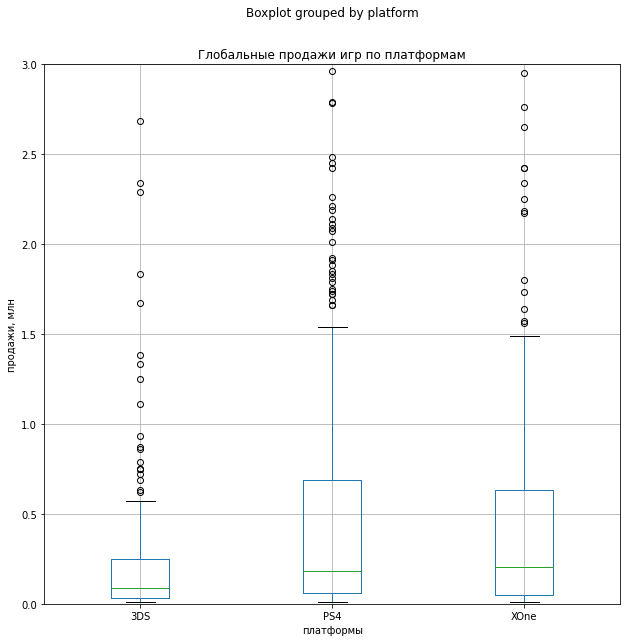

In [ ]:
df[df['platform'].isin(('PS4','3DS','XOne'))].boxplot('total_sales', by='platform',figsize=(10,10));
plt.ylabel('продажи, млн');
plt.xlabel('платформы');
plt.title('Глобальные продажи игр по платформам');
plt.ylim(0,3)
plt.show();

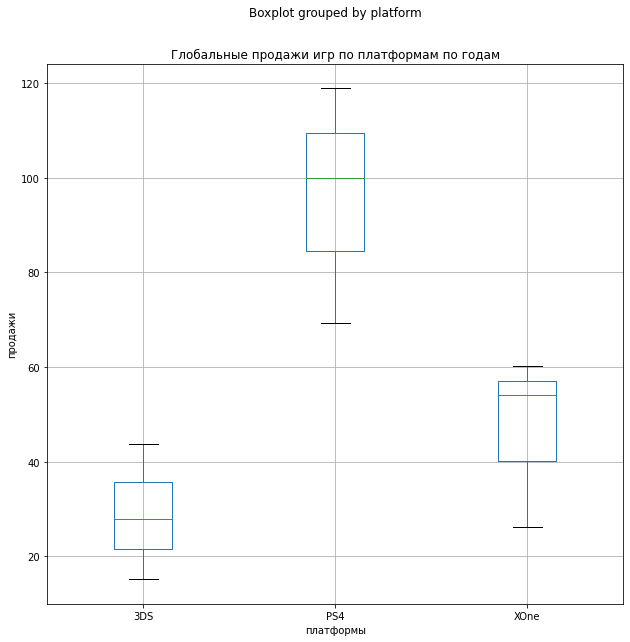

In [ ]:
df[df['platform'].isin(('PS4','3DS','XOne'))].\
pivot_table(index=['platform','release'],values='total_sales',aggfunc='sum').\
boxplot('total_sales', by='platform',figsize=(10,10));
plt.ylabel('продажи');
plt.xlabel('платформы');
plt.title('Глобальные продажи игр по платформам по годам');
plt.show();

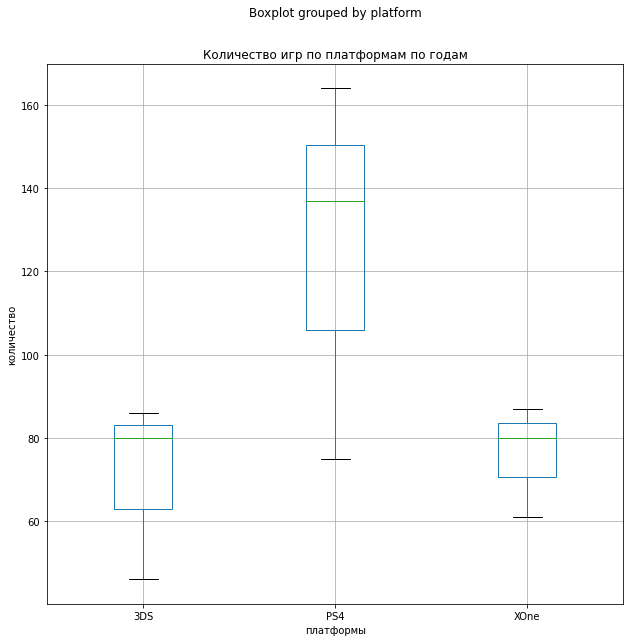

In [ ]:
df[df['platform'].isin(('PS4','3DS','XOne'))].\
pivot_table(index=['platform','release'],values='name',aggfunc='count').\
boxplot('name', by='platform',figsize=(10,10));
plt.ylabel('количество');
plt.xlabel('платформы');
plt.title('Количество игр по платформам по годам');
plt.show();

**глобальная медиана всех продаж у всех платформ примерно одинакова**  
**по размаху глобальных продаж PS4 и XOne лидируют**  
**однако в разбивке по годам, по сумме продаж, и количеству выпущенных игр, явно лидирует PS4**  


## 3.6 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков <a id='section_id_36'></a>
  


In [ ]:
df.head(5)

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,XXX,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,XXX,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,XXX,7.98


In [ ]:
df_corr_PS4 = df.query('platform == "PS4"')

In [2]:
df_corr_PS4 = df_corr_PS4.query('critic_score > 0')

In [ ]:
df_corr_PS4 = df_corr_PS4[['total_sales','user_score','critic_score',]]
df_corr_PS4.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.040132,0.402661
user_score,-0.040132,1.000000,0.546434
critic_score,0.402661,0.546434,1.000000


**интересные наблюдения**  
**оценки критиков коррелируют с продажами - 0.40, и в большей степени с оценками игроков - 0.55**  
**а вот оценки игроков с продажами практически ни не взаимосвязанны - корреляция 0.03**

## 3.7 Соотнесем выводы с продажами игр на других платформах <a id='section_id_37'></a>
  




In [ ]:
df.head(5)

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,XXX,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,XXX,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,XXX,7.98


In [ ]:
# платформа 3DS

df_corr_3DS = df.query('platform == "3DS"')

In [1]:
df_corr_3DS = df_corr_3DS.query('critic_score > 0')

In [ ]:
df_corr_3DS = df_corr_3DS[['total_sales','user_score','critic_score',]]
df_corr_3DS.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.215193,0.314117
user_score,0.215193,1.000000,0.862485
critic_score,0.314117,0.862485,1.000000


In [ ]:
# платформа WiiU

df_corr_WiiU = df.query('platform == "WiiU"')

In [ ]:
df_corr_WiiU = df_corr_WiiU.query('critic_score > 0')

In [ ]:
df_corr_WiiU = df_corr_WiiU[['total_sales','user_score','critic_score',]]
df_corr_WiiU.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.407926,0.370201
user_score,0.407926,1.000000,0.763536
critic_score,0.370201,0.763536,1.000000


In [ ]:
# платформа XOne

df_corr_XOne = df.query('platform == "XOne"')

In [ ]:
df_corr_XOne = df_corr_XOne.query('critic_score > 0')

In [ ]:
df_corr_XOne = df_corr_XOne[['total_sales','user_score','critic_score',]]
df_corr_XOne.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.070384,0.428677
user_score,-0.070384,1.000000,0.440977
critic_score,0.428677,0.440977,1.000000


**в общем и целом корреляции на главных плаформах одинаковы**  
**мнение критиков сильно коррелирует со мнениями игроков, и общими продажи**  

In [ ]:
# более простой код

pltf = ['PS4', 'XOne', '3DS']

df.query('platform in @pltf').pivot_table(index = 'platform', values = ['total_sales', 'critic_score', 'user_score'], aggfunc = 'corr')

critic_score  total_sales  user_score
platform                                                    
3DS      total_sales       0.314117     1.000000    0.215193
         critic_score      1.000000     0.314117    0.862485
         user_score        0.862485     0.215193    1.000000
PS4      total_sales       0.402661     1.000000   -0.040132
         critic_score      1.000000     0.402661    0.546434
         user_score        0.546434    -0.040132    1.000000
XOne     total_sales       0.428677     1.000000   -0.070384
         critic_score      1.000000     0.428677    0.440977
         user_score        0.440977    -0.070384    1.000000

In [ ]:
# посмотрим общую тенденцию

df[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.328105,-0.01307
critic_score,0.328105,1.000000,0.50446
user_score,-0.013070,0.504460,1.00000


**частная тенденция сохраняется и в общем случае, критики и продажи коррелируют лучше**

## 3.8 Общее распределение игр по жанрам <a id='section_id_38'></a>
  


In [ ]:
df.head(5)

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,XXX,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,XXX,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,XXX,7.98


In [ ]:
len(df)

1689

In [ ]:
df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(5)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Name: total_sales, dtype: float64

In [ ]:
df.groupby('genre')['total_sales'].median().sort_values(ascending=False).head(5)

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Name: total_sales, dtype: float64

In [ ]:
df.groupby('genre')['name'].nunique().sort_values(ascending=False).head(5)

genre
Action          338
Role-Playing    151
Adventure       127
Misc             73
Sports           55
Name: name, dtype: int64

In [ ]:
a = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(5)
b = df.groupby('genre')['total_sales'].median().sort_values(ascending=False).head(5)
x = a + b 
x = x.dropna()
x

genre
Role-Playing    101.550
Shooter         171.455
Sports          109.660
Name: total_sales, dtype: float64

In [ ]:
a = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).tail(5)
b = df.groupby('genre')['total_sales'].median().sort_values(ascending=False).tail(5)
x = a + b 
x = x.dropna()
x

genre
Adventure    17.580
Puzzle        2.255
Strategy      4.020
Name: total_sales, dtype: float64

**можно обратить внимание, что динамичные и быстрые игры продаются очень хорошо**  
**топ жанры по продажам, `Shooter`, `Sports`, `Role-Playing`**  
**а вот медитативные, игры где нужно время подумать, не пользуются популярностью**  
**самые не прибыльные жанры -`Adventure`, `Strategy` и `Puzzle`**  
  
**по количеству уникальных наименований игр, жанры: - `Action`,`Misc`, `Adventure` - самые многообразные**  
**выбор во что поиграть в этих жанрах более обшырный**  


## 3.9 Вывод <a id='section_id_39'></a>

**- период, в пределах которого может зародиться и умереть определенная платформа, можно назвать 10 лет**  
**- был период 2013-2014, пик популярности игровых платформ**  
**- однако последнее время наблюдается общий спад продаж на всех платформах**  
**- актуальный период для дальнейшего анализа выбрали 2014-2016**
**- потенциально прибыльные платформы на 2016 год: PS4, 3DS, и XOne**  
**- PS4 выделяется среди остальных, как более круппный игрок на рынке платформ**  
**- общии продажи в большей степени коррелируют с мнением критиков**  
**- популярные жанры - `Shooter`, `Sports`, `Role-Playing` - хорошо продаются**  
**- жанры - `Action`,`Misc`, `Adventure` - имеют хороший выбор игр**  

[оглавление](#section_id_100)

<BR>

# Шаг 4. Портрет пользователя каждого региона <a id='section_id_4'></a>



## 4.1 Самые популярные платформы (топ-5) <a id='section_id_41'></a>


In [ ]:
df.head(5)

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,XXX,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,XXX,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,XXX,7.98


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,0.32
X360,28.30,15.49,0.08
3DS,22.64,16.12,44.24
PS3,22.05,25.54,11.22


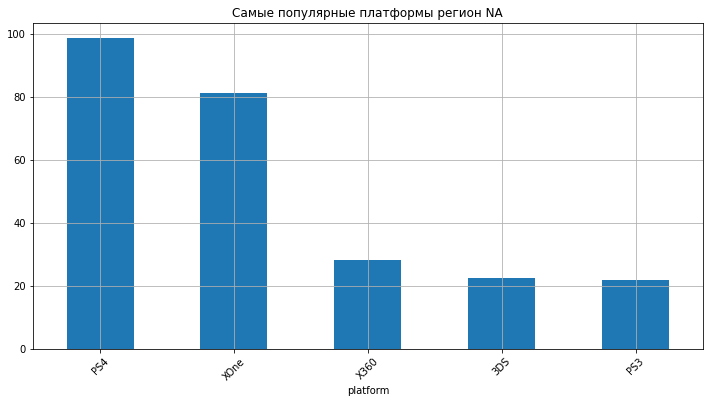

In [ ]:
# регион NA 

print(df.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False).head(5).plot(kind='bar',grid=True, \
                                            figsize=(12,6),title='Самые популярные платформы регион NA', rot=45));

df.groupby('platform')['na_sales','eu_sales','jp_sales'].sum().sort_values(by='na_sales',ascending=False).head(5)

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,eu_sales,na_sales,jp_sales
platform,,,
PS4,130.04,98.61,15.02
XOne,46.25,81.27,0.32
PS3,25.54,22.05,11.22
PC,17.97,7.23,0.00
3DS,16.12,22.64,44.24


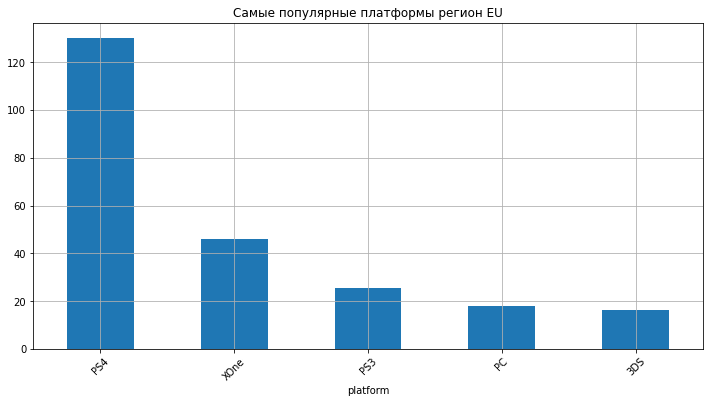

In [ ]:
# регион EU

print(df.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False).head(5).plot(kind='bar',grid=True, \
                                            figsize=(12,6),title='Самые популярные платформы регион EU', rot=45));


df.groupby('platform')['eu_sales','na_sales','jp_sales'].sum().sort_values(by='eu_sales',ascending=False).head(5)

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,jp_sales,na_sales,eu_sales
platform,,,
3DS,44.24,22.64,16.12
PS4,15.02,98.61,130.04
PSV,14.54,2.52,3.53
PS3,11.22,22.05,25.54
WiiU,7.31,19.36,13.15


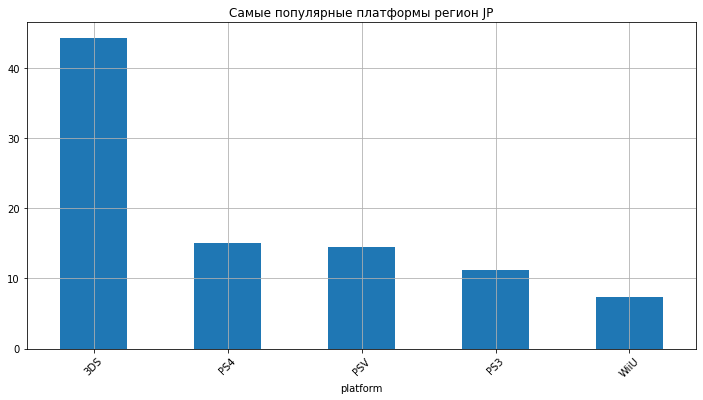

In [ ]:
# регион JP

print(df.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False).head(5).plot(kind='bar',grid=True, \
                                            figsize=(12,6),title='Самые популярные платформы регион JP', rot=45));

df.groupby('platform')['jp_sales','na_sales','eu_sales'].sum().sort_values(by='jp_sales',ascending=False).head(5)


**в Америке и в Европе топ-3 платформ это `PS4`, и `XOne`**  
**а в Японии - `3DS`, `PS4` и `PSV`, - а вот `X360` даже не в топ-5**  
**скорее всего это связано с тем, что SONY и вся линейка платформ PlayStation, это японский бренд**  

## 4.2 Самые популярные жанры (топ-5) <a id='section_id_42'></a>


In [ ]:
df.head(5)

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,XXX,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,XXX,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,XXX,7.98


In [ ]:
# регион NA 

df.groupby('genre')['na_sales','eu_sales','jp_sales'].sum().sort_values(by='na_sales',ascending=False).head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,na_sales,eu_sales,jp_sales
genre,,,
Shooter,79.02,65.52,4.87
Action,72.53,74.68,29.58
Sports,46.13,45.73,3.26
Role-Playing,33.47,28.17,31.16
Misc,15.05,12.86,5.61


In [ ]:
# регион EU

df.groupby('genre')['eu_sales','na_sales','jp_sales'].sum().sort_values(by='eu_sales',ascending=False).head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,eu_sales,na_sales,jp_sales
genre,,,
Action,74.68,72.53,29.58
Shooter,65.52,79.02,4.87
Sports,45.73,46.13,3.26
Role-Playing,28.17,33.47,31.16
Racing,14.13,8.74,1.76


In [ ]:
# регион JP

df.groupby('genre')['jp_sales','na_sales','eu_sales'].sum().sort_values(by='jp_sales',ascending=False).head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,jp_sales,na_sales,eu_sales
genre,,,
Role-Playing,31.16,33.47,28.17
Action,29.58,72.53,74.68
Fighting,6.37,12.43,6.69
Misc,5.61,15.05,12.86
Shooter,4.87,79.02,65.52


**Америка Европа предпочитают одни и те же жанры - `Action`, `Shooter`, `Sports`**  
**а вот у Японии иные вкусы - `Role-Playing`, `Action`, `Fighting`**

## 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе? <a id='section_id_43'></a>



In [ ]:
df.head(5)

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,XXX,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,XXX,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,XXX,7.98


In [ ]:
df['rating'].value_counts()

XXX     749
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

«XXX» - это наши пропуски  
«T» («Teen») — «Подросткам»  
«M» («Mature») — «Для взрослых»  
«E» («Everyone») — «Для всех»  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  



In [ ]:
# регион NA 

df['rating'] = df['rating'].replace('XXX',np.nan)

df.groupby('rating')['na_sales','eu_sales','jp_sales'].sum().sort_values(by='na_sales',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


In [ ]:
# регион EU

df.groupby('rating')['eu_sales','na_sales','jp_sales'].sum().sort_values(by='eu_sales',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,eu_sales,na_sales,jp_sales
rating,,,
M,93.44,96.42,8.01
E,58.06,50.74,8.94
T,34.07,38.95,14.78
E10+,26.16,33.23,4.46


In [ ]:
# регион JP

df.groupby('rating')['jp_sales','na_sales','eu_sales'].sum().sort_values(by='jp_sales',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,jp_sales,na_sales,eu_sales
rating,,,
T,14.78,38.95,34.07
E,8.94,50.74,58.06
M,8.01,96.42,93.44
E10+,4.46,33.23,26.16


**в Америке и Европе топ прибыльных рейтингов абсолютно одинаков**   
**больше всего приносят игры с рейтингом «M» («Для взрослых»)**
**«E» («Для всех») и «T» («Подростки») идут следом**  
**в Японии все иначе, основной приток сосредоточен на «T» («Подростки»)**

## 4.4 Вывод <a id='section_id_44'></a>

**- портрет пользователей Америки и Европы очень схожи, они пердпочитают одни и те же платформы, и жанры**  
**- `PS4`, `XOne` и `Action`, `Shooter`, `Sports` соответственно**  
**- Японский игрок предпочитает отечественные бренды, играет в основном на `3DS`, `PS4` и `PSV`**   
**- вкусовые предпочтения - `Role-Playing`, `Action`, `Fighting`**  
 
**- в Америке и Европе самый прибыльный рейтинг - «M» («Для взрослых»)**  
**- в Японии - «T» («Подростки»)**  


[оглавление](#section_id_100)

In [ ]:
# возьмем сразу датафрейм за актуальный период

jp_pltf_pivot = df.query('release > 2013').pivot_table(index = 'platform', aggfunc = 'sum', values = 'jp_sales').reset_index().sort_values('jp_sales', ascending = False).head(5)
display(jp_pltf_pivot)

# теперь визуализируем с помощью круговой диаграммы

import plotly.graph_objects as go


fig = go.Figure(data=[go.Pie(labels=jp_pltf_pivot.platform, values=jp_pltf_pivot.jp_sales)])
fig.show()

# посмотрим на жанры

jp_genres_pivot = df.query('release > 2013').pivot_table(index = 'genre', aggfunc = 'sum', values = 'jp_sales').reset_index().sort_values('jp_sales', ascending = False).head(5)
display(jp_genres_pivot)

# визуализируем

fig = px.bar(jp_genres_pivot, x = 'genre', y = 'jp_sales', color = 'jp_sales', title = 'Распределение по жанрам Япония')
fig.show()

# рейтинг

fig = px.line(df.query('release > 2013').pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').reset_index(),
             x = 'rating', y = 'jp_sales')
fig.show()

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


<BR>

# Шаг 5. Проверка гипотез <a id='section_id_5'></a>

## 5.1 Гипотиза 1 <a id='section_id_51'></a>
  
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


Нулева гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотиза: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Уровень значимости alpha: 0,05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок

Если p-value будет меньше выбраного уровня значимости alpha, то нулевую гипотизу отвергаем.

Если p-value будет больше выбраного уровня значимости alpha, то это будет значить, что данные не позволили нам отвергнуть нулевую гипотизу.

In [ ]:
df.head(5)

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98


In [ ]:
df['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [ ]:
# сделаем два среза по платформам, и уберем пропуски из них

df_XOne = df.query('platform == "XOne"')
df_PC = df.query('platform == "PC"')

print(len(df_XOne))
print(len(df_PC))

228
151


In [ ]:
df_XOne = df_XOne.dropna(subset=['user_score'])
df_PC = df_PC.dropna(subset=['user_score'])

In [ ]:
print(len(df_XOne))
print(len(df_PC))

165
122


In [ ]:
# дисперсия оценок геймеров, платформа XOne

var_XOne = np.var(df_XOne['user_score'],ddof=1)
var_XOne

1.8910066518846989

In [ ]:
# дисперсия оценок геймеров, платформа PC

var_PC = np.var(df_PC['user_score'],ddof=1)
var_PC

2.9011543151334522

In [ ]:
# Тест Левена

stat, p = levene(df_XOne['user_score'], df_PC['user_score'])
p 

0.014868430917663678

In [ ]:
p < 0.05

True

**п-значение меньше альфы**  
**дисперсии различны** 

In [ ]:
stat, p = levene(df_XOne.query('release > 2013')['user_score'], df_PC.query('release > 2013')['user_score'])
p 

0.014868430917663678

In [ ]:
alpha = 0.05

test_1 = st.ttest_ind(df_XOne['user_score'],df_PC['user_score'],equal_var=False)
test_1.pvalue

0.11601398086668827

In [ ]:
test_1.pvalue > alpha

True

**значение p-value оказалось больше уровня значимости альфа**  
**данные не позволили нам отвергнуть нулевую гипотизу**   
**это значит:**  
**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

## 5.2 Гипотиза 2 <a id='section_id_52'></a>
  
### Средние пользовательские рейтинги жанров Action и Sports разные


Нулева гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковы

Альтернативная гипотиза: Средние пользовательские рейтинги жанров Action и Sports различаются

Уровень значимости alpha: 0,05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок

Если p-value будет меньше выбраного уровня значимости alpha, то нулевую гипотизу о равенстве средних отвергаем.

Если p-value будет больше выбраного уровня значимости alpha, то это будет значить что данные не позволили нам отвергнуть нулевую гипотизу.

In [ ]:
df.head(5)

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98


In [ ]:
df['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [ ]:
# сделаем два среза по жанрам, и уберем пропуски 

df_Action = df.query('genre == "Action"')
df_Sports = df.query('genre == "Sports"')

print(len(df_Action))
print(len(df_Sports))

619
161


In [ ]:
df_Action = df_Action.dropna(subset=['user_score'])
df_Sports = df_Sports.dropna(subset=['user_score'])

In [ ]:
print(len(df_Action))
print(len(df_Sports))

297
127


In [ ]:
# дисперсия оценок геймеров, жанр Action

var_Action = np.var(df_Action['user_score'],ddof=1)
var_Action

1.898476658476659

In [ ]:
# дисперсия оценок геймеров, жанр Sports

var_Sports = np.var(df_Sports['user_score'],ddof=1)
var_Sports

3.4469791276090476

In [ ]:
# Тест Левена

stat, p = levene(df_Action['user_score'], df_Sports['user_score'])
p

4.480161685830322e-06

In [ ]:
p < 0.05

True

**п-значение меньше альфы**  
**дисперсии различны** 

In [ ]:
alpha = 0.05

test_2 = st.ttest_ind(df_Action['user_score'],df_Sports['user_score'],equal_var=False)
test_2.pvalue

1.1825550382644557e-14

In [ ]:
test_2.pvalue < alpha

True

**значение p-value меньше уровня значимости альфа**  
**нулевую гипотизу отвергаем**  
**это значит, верна альтернативная гипотеза:**  
**Средние пользовательские рейтинги жанров Action и Sports разные** 

## 5.3 Вывод <a id='section_id_53'></a>


**- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**  
**- Средние пользовательские рейтинги жанров Action и Sports разные**  

[оглавление](#section_id_100)

<BR>

# Шаг 6. Общий вывод <a id='section_id_6'></a>

  
  
## Отчет по проделанной работе

**На стадии обработки данных были выявлены странные значения в user_score - tbd**  
  
**На стадии статистического анализа мы пришли к выводу:**    
- **актуальный период для анализа необходимо выбрать последнее десятилеие - 2013/2016**    
- **потенциально прибыльные платформы на 2016 год: PS4, 3DS, и XOne**    
- **PS4 главный игрок на рынке платформ**    
- **продажи коррелируют с мнением критиков сильнее чем с мнением игроков**  
- **жанры - Shooter, Sports, Role-Playing - хорошо продаются**  
- **жанры - Action, Misc, Adventure - имеют хороший выбор игр**
  
**Так же, при формировании образа потенциального клиента, было выявлено:**
- **игроки Америки и Европы очень схожи, они пердпочитают одни и те же платформы, и жанры**  
- **топовые платформы PS4, XOne**  
- **топовые жанры Action, Shooter, Sports**
- **игроки Японского региона играют на 3DS, PS4 и PSV, и предпочитают жанры Role-Playing, Action, Fighting**  
- **в Америке и Европе самый прибыльный рейтинг - «M» («Для взрослых»)**  
- **в Японии - «T» («Подростки»)**
  
**Проверили несколько гипотиз:**  
- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**  
- **Средние пользовательские рейтинги жанров Action и Sports разные**  
  

  
## Итог   
  
**Мы провели большую работу, проанализировав исторические данные о продажах игр, оценки пользователей и экспертов, жанров и платформ до 2016 года**
  
**Это помогло нам выявить некоторые закономерности определяющие успешность игры**  

**Опираясь на это, вы можете сделать ставку на потенциально популярный продукт и спланировать рекламную кампанию на 2017 год**

<BR>  
    
[оглавление](#section_id_100)

<BR>